## Laboratorio di Simulazione Numerica 

# ESERCITAZIONE 6 #

### esercizio 6.1 

In questa esercitazione abbiamo simulato un modello di Ising unidimensionale e ne abbiami confrontato i risultati con la soluzione analitica. Il sistema è infatti esattamente risolubile, è composto da $N$ spin la cui interazione con i vicini più prossimi è descritta dalla seguente Hamiltoniana ( da qui in poi assumeremo le seguenti costanti di valore $\mu_B=1$ e $k_B=1$):

$$
H = 
-J\sum_{i=1}^N s_i s_{i+1}
-\frac{h}{2}\sum_{i=1}^N (s_i + s_{i+1}) 
$$

dove $\{ s_i \}_{i=1,N}$ sono variabili di spin che prendono valori da $\{-1;1\}$, $J>0$ (modello ferromagnetico)


In questo esercizio eravamo già provvisti di un codice iniziale, che abbiamo dovuto integrare e migliorare.
Nella fattispecie abbiamo scritto due diversi metodi per implentare il peso di Boltzmann $p(\{ s_i \}) = \exp(-\beta H)/Z$, necessario alla simulazione, che si basano, rispettivamente:
- L'algoritmo di Metropolis 
- l'algoritmo di Gibbs 

Abbiamo anche aggiunto la possibilità di "restart", ricominciare la simulazione partendo da una vecchia configurazione, l'ultima ottenuta nella precedete simulazione.

Migliorato il codice, l'abbiamo utilizzato in una configurazione di $N=50$ spin e $J=1$, per stimare, in un range di temperatura $T$ tra $\left[0.5;2.0\right]$, le osservabili  $U(N,T)$, $C(N,T)$, $\chi(N,T)$, $M(N,T,h)$.

Questo sono definite come:
1. $U(N,T) = \langle H \rangle_{h=0}$
2. $C(N,T) = k_B \beta^2 (\langle H^2 \rangle_{h=0}-\langle H \rangle_{h=0}^2)$ 
3. $\chi(N,T) = \beta \langle (\sum_{i=1,N}s_i)^2 \rangle_{h=0}$
4. $M(N,T,h=0.02)= \langle \sum_{i=1,N}s_i \rangle_{h=0.02}$

Il codice di partenza implementava solo il calcolo dell'energia interna  $U(N,T)$, abbiamo pertanto dovuto anche integrare il calcolo delle altre grandezze osservabili.

Ultimati i miglioramenti del codice, la prima cosa necessaria alla simulazione è l'equilibrazione del sistema. Alla prima simulazione, infatti, non è possibile eseguire un restart e partanto la configurazione di partenza risulta essere quella dove i valori degli spin vengono determinati randomicamente, $1$ o $-1$ indifferentemte. Questa configurazione è tuttavia compatibile con una temperatura $T=\infty$. Come detto, $T$ deve essere nel range $\left[0.5;2.0\right]$, quindi all'inizio della simulazione il sistema dovrà prima assestarsi in modo tale che la configurazione rispetti la temperatura richiesta.

Per andare a studiare l'equilibrazione del sistema abbiamo guardato l'evoluzione del valore dell'energia interna in funzione degli step, per le diverse temperature. Riportiamo di seguito i risultati ottenuti, sia usando il metodo di Gibbs che quello di Metropolis.

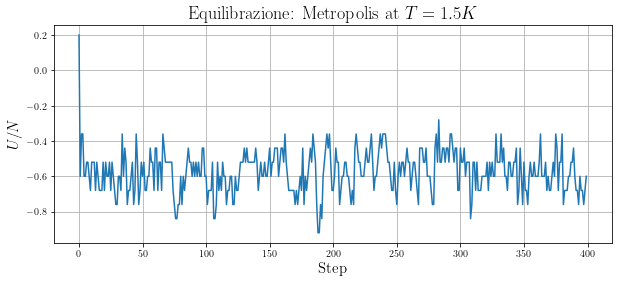

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

N=50

plt.rc('text', usetex=True)
plt.rc('font', family='arial')


f = plt.figure(figsize=(10,4))
em5 = np.loadtxt("u_eq_metro.txt")
x = np.arange(em5.size)
plt.plot(x, em5/N)
plt.title('Equilibrazione: Metropolis at $T = 1.5 K$', fontsize=18)
plt.ylabel('$U/N$', fontsize=15)
plt.xlabel('Step', fontsize=15)
plt.grid(True)

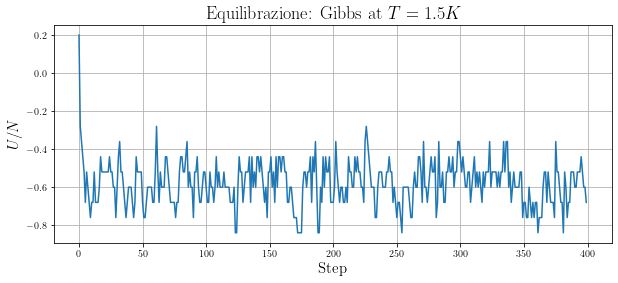

In [3]:
f = plt.figure(figsize=(10,4))
em5 = np.loadtxt("u_eq_Gibbs.txt")
x = np.arange(em5.size)
plt.plot(x, em5/N)
plt.title('Equilibrazione: Gibbs at $T = 1.5 K$', fontsize=18)
plt.ylabel('$U/N$', fontsize=15)
plt.xlabel('Step', fontsize=15)
plt.grid(True)

Una volta equilibrato il sistema abbiamo iniziato la simulazione vera e propria. Abbiamo diviso il range di temperatura in 12 sottointervalli, andando così a valutare i valori medi delle osservabili in corrispondenza di solo 12 ben precisi valori di $T$. Abbiamo eseguito sia in presenza ($h=0.02$) che in assenza ($h=0$) di campo magnetico ($M$ infatti andava stimata con un campo presente, le altre grandezze con campo assente) e sia usanto l'algoritmo di Metropolis che quello di Gibbs. Abbiamo stimato i valori medi delle osservabili con il data blocking, ogni simulazione corrisponde a $2\times10^5$ step suddivisi in $20$ blocchi.

Riportiamo di seguito i risultati ottenuti, già confrontati con i risultati analitici.

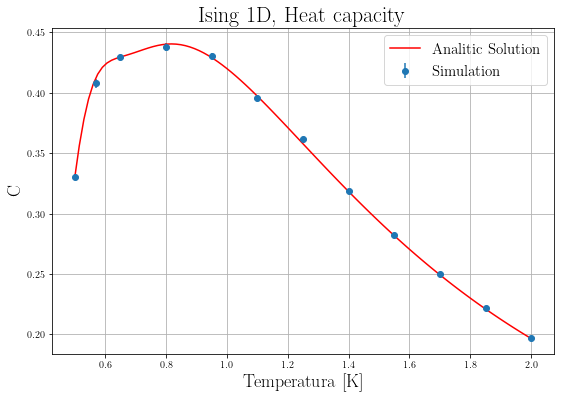

In [37]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

plt.rc('text', usetex=True)
plt.rc('font', family='arial')

x, f, error = np.loadtxt("ave.heat.final_metropolis", usecols=(0,1,2), unpack='true')
plt.figure(figsize=(9,6))
plt.errorbar(x,f,yerr=error, label='Simulation', fmt='o')

points=100
T = np.linspace(0.5,2.0,num=points)
beta = 1/T
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th
heat=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)


plt.plot(T, heat, 'r', label='Analitic Solution')
plt.legend(loc='best', fontsize=15)
plt.title('Ising 1D, Heat capacity', fontsize = 22)
plt.xlabel('Temperatura [K]', fontsize=18)
plt.ylabel('C', fontsize=18)


plt.grid(True)
plt.show()

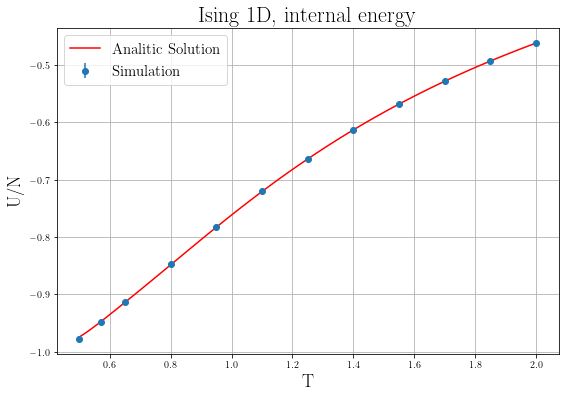

In [33]:
points=100
T = np.linspace(0.5,2.0,num=points)
beta = 1/T
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th
e = -J*( th + ch*thN )/( 1 + thN )
plt.figure(figsize=(9,6))

plt.plot(T, e, 'r', label='Analitic Solution')
plt.title('Ising 1D, internal energy', fontsize = 22)
plt.xlabel('T', fontsize = 18)
plt.ylabel('U/N', fontsize = 18)

x, f, error = np.loadtxt("ave.ene.final_metropolis", usecols=(0,1,2), unpack='true')
plt.errorbar(x,f,yerr=error,label='Simulation', fmt='o')
plt.legend(loc='best', fontsize=15)

plt.grid(True)

plt.show()

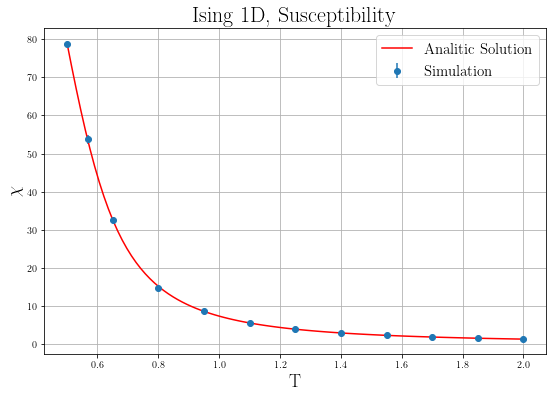

In [38]:
plt.figure(figsize=(9,6))

x, f, error = np.loadtxt("ave.chi.final_metropolis", usecols=(0,1,2), unpack='true')
plt.errorbar(x,f,yerr=error,label='Simulation', fmt='o')

X = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)
plt.plot(T, X, 'r', label='Analitic Solution')
plt.title('Ising 1D, Susceptibility', fontsize = 22)
plt.xlabel('T', fontsize = 18)
plt.ylabel('$\chi$', fontsize =18)
plt.legend(loc='best', fontsize=15)
plt.grid(True)
plt.show()

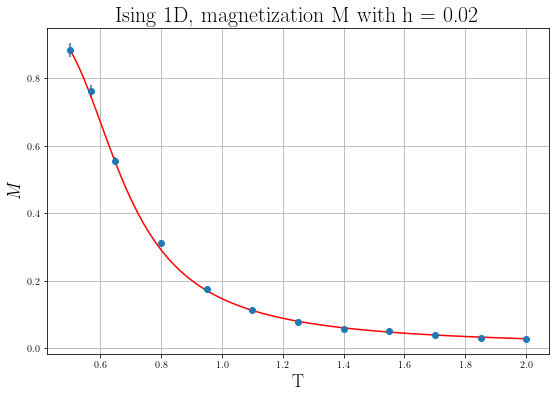

In [52]:
h=0.02 #external field
b = 1/T

plt.figure(figsize=(9,6))

x, f, error = np.loadtxt("ave.mag.final_metropolis", usecols=(0,1,2), unpack='true')
plt.errorbar(x,f,yerr=error,label='Simulation', fmt='o')

l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
M = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)
plt.plot(T, M, 'r',  label='Analitic Solution')
plt.title('Ising 1D, magnetization M with h = 0.02', fontsize = 22)
plt.xlabel('T', fontsize = 18)
plt.ylabel('$M$', fontsize = 18)

plt.grid(True)
plt.show()

### Gibbs

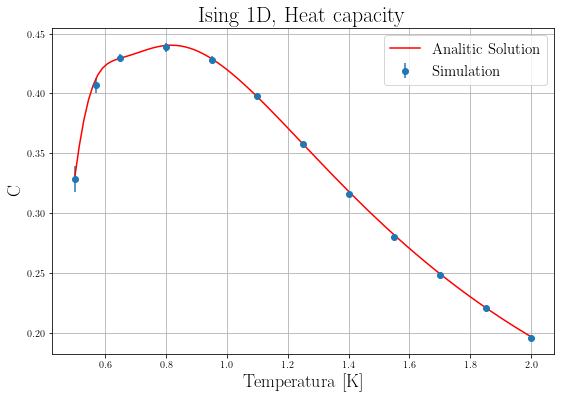

In [53]:
x, f, error = np.loadtxt("ave.heat.final_gibbs", usecols=(0,1,2), unpack='true')
plt.figure(figsize=(9,6))
plt.errorbar(x,f,yerr=error, label='Simulation', fmt='o')

points=100
T = np.linspace(0.5,2.0,num=points)
beta = 1/T
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th
heat=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)


plt.plot(T, heat, 'r', label='Analitic Solution')
plt.legend(loc='best', fontsize=15)
plt.title('Ising 1D, Heat capacity', fontsize = 22)
plt.xlabel('Temperatura [K]', fontsize=18)
plt.ylabel('C', fontsize=18)


plt.grid(True)
plt.show()

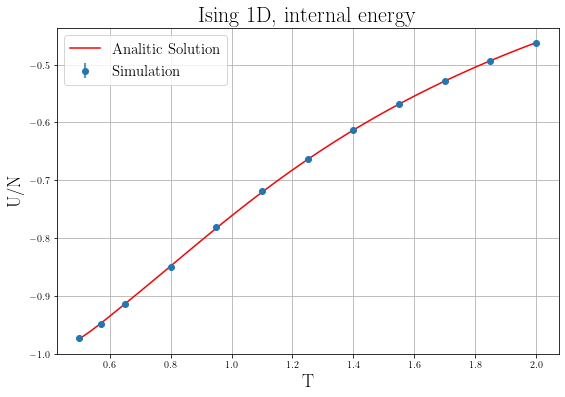

In [54]:
points=100
T = np.linspace(0.5,2.0,num=points)
beta = 1/T
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th
e = -J*( th + ch*thN )/( 1 + thN )
plt.figure(figsize=(9,6))

plt.plot(T, e, 'r', label='Analitic Solution')
plt.title('Ising 1D, internal energy', fontsize = 22)
plt.xlabel('T', fontsize = 18)
plt.ylabel('U/N', fontsize = 18)

x, f, error = np.loadtxt("ave.ene.final_gibbs", usecols=(0,1,2), unpack='true')
plt.errorbar(x,f,yerr=error,label='Simulation', fmt='o')
plt.legend(loc='best', fontsize=15)

plt.grid(True)

plt.show()

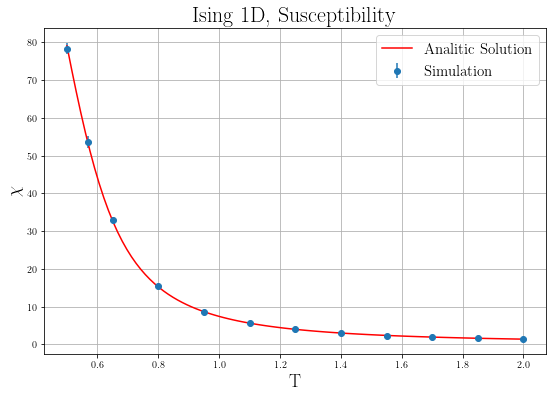

In [55]:
plt.figure(figsize=(9,6))

x, f, error = np.loadtxt("ave.chi.final_gibbs", usecols=(0,1,2), unpack='true')
plt.errorbar(x,f,yerr=error,label='Simulation', fmt='o')

X = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)
plt.plot(T, X, 'r', label='Analitic Solution')
plt.title('Ising 1D, Susceptibility', fontsize = 22)
plt.xlabel('T', fontsize = 18)
plt.ylabel('$\chi$', fontsize =18)
plt.legend(loc='best', fontsize=15)
plt.grid(True)
plt.show()

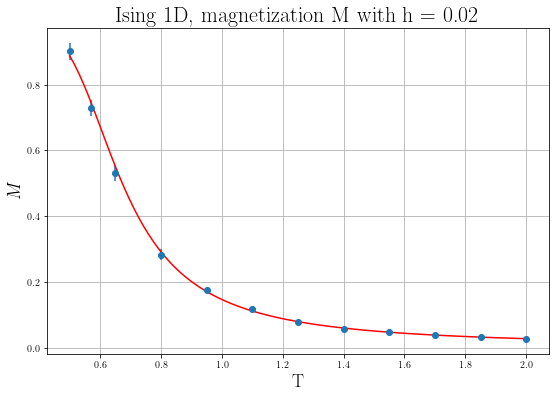

In [56]:
h=0.02 #external field
b = 1/T

plt.figure(figsize=(9,6))

x, f, error = np.loadtxt("ave.mag.final_gibbs", usecols=(0,1,2), unpack='true')
plt.errorbar(x,f,yerr=error,label='Simulation', fmt='o')

l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
M = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)
plt.plot(T, M, 'r',  label='Analitic Solution')
plt.title('Ising 1D, magnetization M with h = 0.02', fontsize = 22)
plt.xlabel('T', fontsize = 18)
plt.ylabel('$M$', fontsize = 18)

plt.grid(True)
plt.show()

I risultati ottenuti sono compatibili con le soluzioni analitiche.
Data la difficoltà riscontrata nell'ottenere un risultato soddisfacente per $C$ per basse temperature abbiamo, limitatamente a questi valori di $T$, aumentato l'ampiezza dei blocchi. Abbiamo mantenuto 20 blocchi, ma da $10^5$ step l'uno. 